# Завдання 4. Візуалізація піраміди

In [30]:
import uuid

import networkx as nx
import matplotlib.pyplot as plt
import heapq
import random


class Node:
  def __init__(self, key, color="skyblue"):
    self.left = None
    self.right = None
    self.val = key
    self.color = color # Додатковий аргумент для зберігання кольору вузла
    self.id = str(uuid.uuid4()) # Унікальний ідентифікатор для кожного вузла
      
  def __repr__(self):
    return str(self.val)


def add_edges(graph, node, pos, x=0, y=0, layer=1):
  if node is not None:
    graph.add_node(node.id, color=node.color, label=node.val) # Використання id та збереження значення вузла
    if node.left:
      graph.add_edge(node.id, node.left.id)
      l = x - 1 / 2 ** layer
      pos[node.left.id] = (l, y - 1)
      l = add_edges(graph, node.left, pos, x=l, y=y - 1, layer=layer + 1)
    if node.right:
      graph.add_edge(node.id, node.right.id)
      r = x + 1 / 2 ** layer
      pos[node.right.id] = (r, y - 1)
      r = add_edges(graph, node.right, pos, x=r, y=y - 1, layer=layer + 1)
  return graph


def draw_tree(tree_root):
  tree = nx.DiGraph()
  pos = {tree_root.id: (0, 0)}
  tree = add_edges(tree, tree_root, pos)

  colors = [node[1]['color'] for node in tree.nodes(data=True)]
  labels = {node[0]: node[1]['label'] for node in tree.nodes(data=True)} # Використовуйте значення вузла для міток

  plt.figure(figsize=(8, 5))
  nx.draw(tree, pos=pos, labels=labels, arrows=False, node_size=2500, node_color=colors)
  plt.show()


In [31]:
def build_tree(data):
    heapq.heapify(data)
    
    if not data:
        return None

    nodes = [Node(value) for value in data]

    for i in range(len(data)):
        left_index = 2 * i + 1
        right_index = 2 * i + 2
        if left_index < len(data):
            nodes[i].left = nodes[left_index]
        if right_index < len(data):
            nodes[i].right = nodes[right_index]

    return nodes[0]

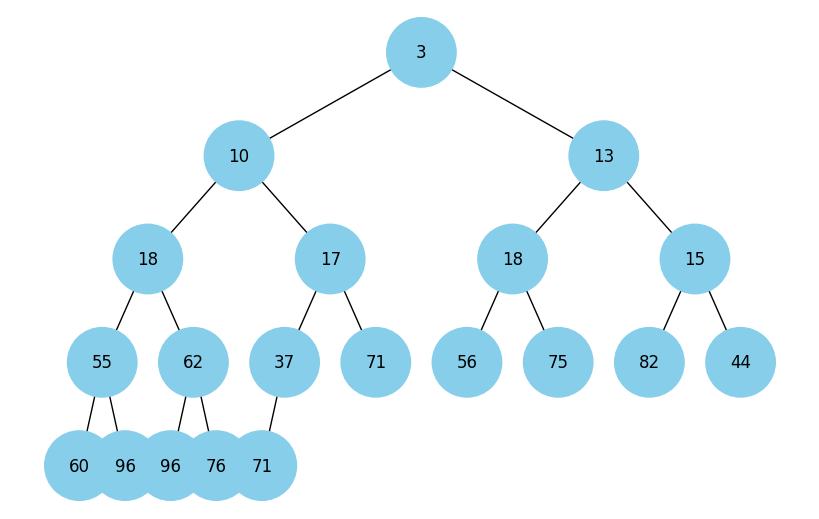

In [32]:
nums = [random.randint(1, 100) for _ in range(20)]

draw_tree(build_tree(nums))